## sklearn.tree

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree

import numpy as np

In [3]:
%matplotlib inline

### Генерация данных

In [4]:
classification_problem = datasets.make_classification(n_features=2,
                                                     n_informative=2,
                                                     n_classes=3,
                                                     n_redundant=0,
                                                     n_clusters_per_class=1,
                                                     random_state=3)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

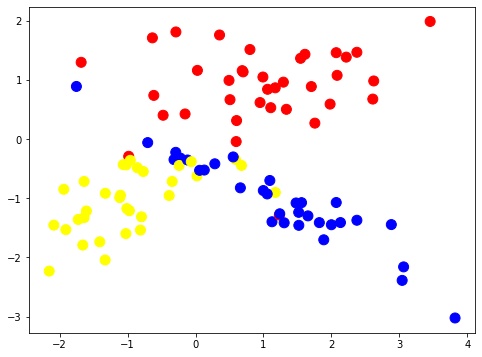

In [6]:
pylab.figure(figsize=(8, 6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), 
             list(map(lambda x: x[1], classification_problem[0])),
             c=classification_problem[1], cmap=colors, s=100)

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                    classification_problem[1], 
                                                                                    test_size=0.3, random_state=1)

### Модель DecisionTreeClassifier

In [8]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [9]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [10]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [11]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [12]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

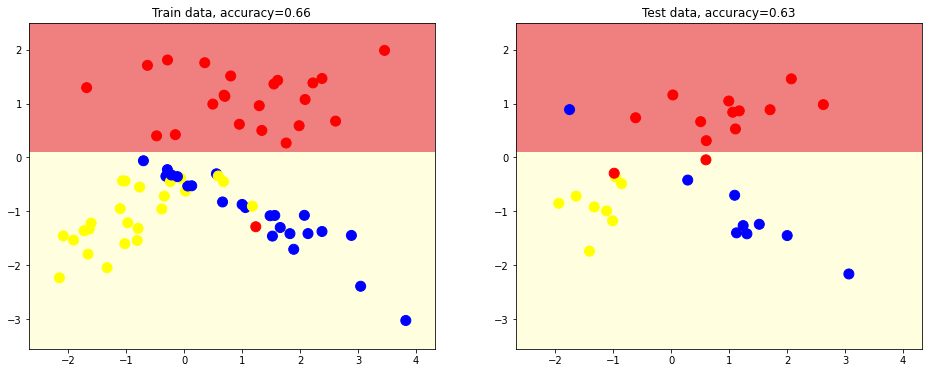

In [13]:
estimator = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

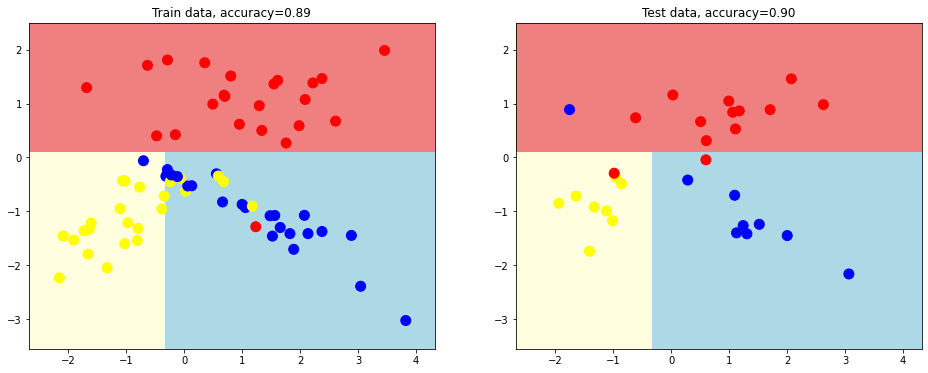

In [14]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, 
                                                  max_depth=2), 
                      train_data, train_labels, test_data, test_labels)

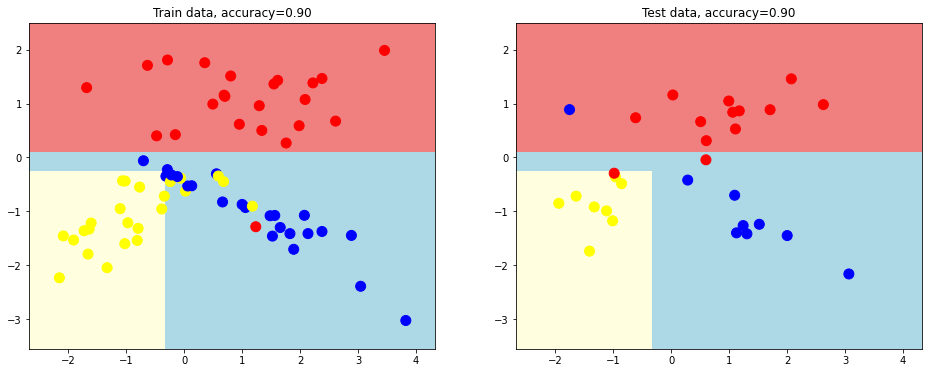

In [15]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, 
                                                  max_depth=3), 
                      train_data, train_labels, test_data, test_labels)

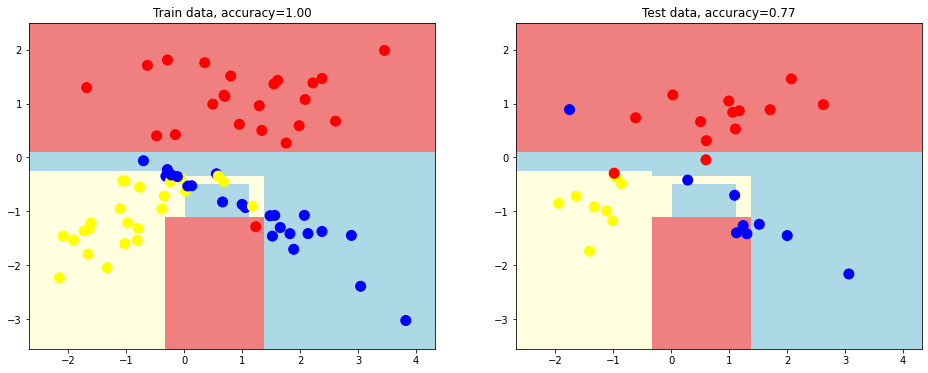

In [16]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1), 
                      train_data, train_labels, test_data, test_labels)

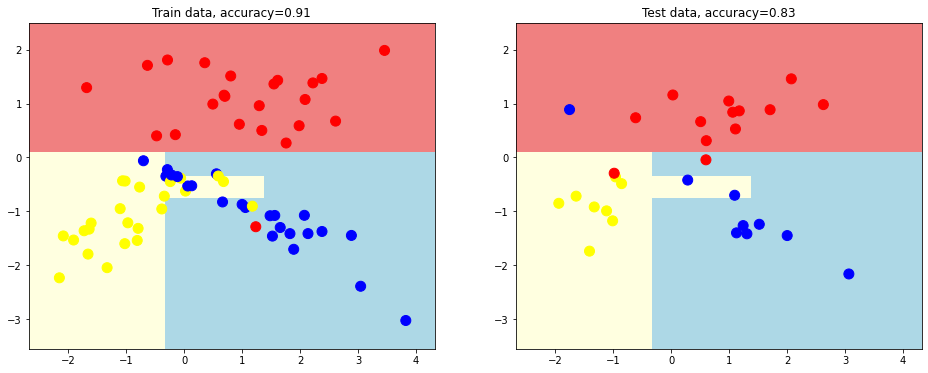

In [19]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4), 
                      train_data, train_labels, test_data, test_labels)

In [31]:
parameters_grid = {
    'max_depth' : np.arange(1, 11),
    'min_samples_leaf' : np.arange(1, 11)
}

In [32]:
cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [33]:
grid_cv = model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state=1), 
                                       parameters_grid, 
                                       scoring = 'accuracy', 
                                       cv = cv)

In [34]:
%%time
grid_cv.fit(train_data, train_labels)

CPU times: total: 1.19 s
Wall time: 1.17 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [35]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [36]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8285714285714286
{'max_depth': 5, 'min_samples_leaf': 5}


### Вывод

Использовать два вида критериев останова вместе в данном случае не эффективно. По отдельности они дают лучшие результаты. Ниже представлены самые оптимальные варианты моделей с каждым из критериев:

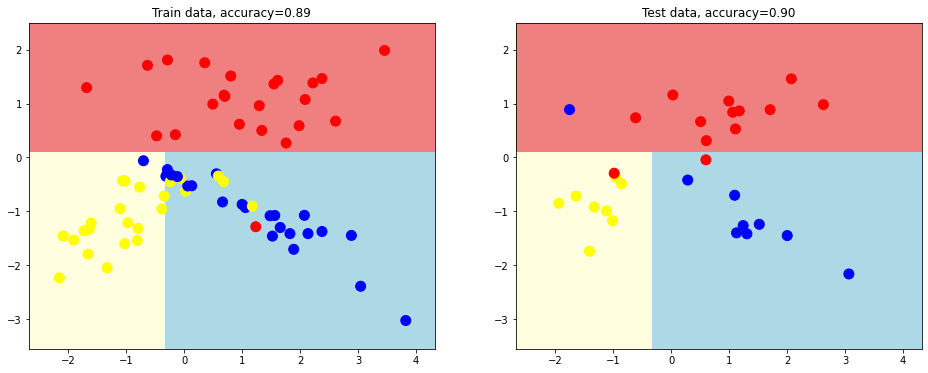

In [60]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 6), 
                      train_data, train_labels, test_data, test_labels)

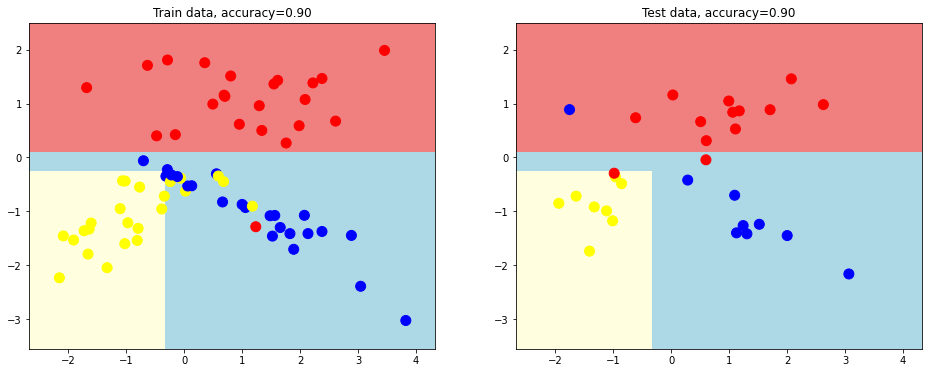

In [40]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state=1, 
                                                  max_depth=3), 
                      train_data, train_labels, test_data, test_labels)